# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
Description: Process xdf files recorded from experimental sessions to determine file eligibility and data feature extraction.<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P005 participant_P005_exp001_block_long


In [3]:
filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"

filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)

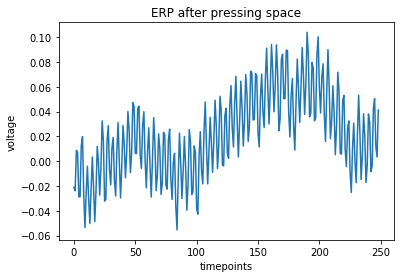

In [4]:
# ERP after space press
space_press_data, _, _ = getTimeBoundSingleLabelData("spacePressed", filtered_cleaned_data, 0, 1)
eeg_list = tidyEEGList(getEEGFromDataList_AvgLeftRight(space_press_data))
plt.plot(np.mean(eeg_list, axis=0))


plt.title("ERP after pressing space")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.show()


num in list: 29
num in list: 85
num in list: 73
num in list: 107
num in list: 66


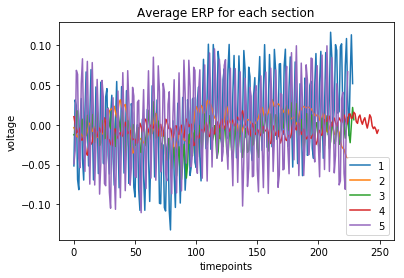

In [5]:
# Display average ERPs for each section
for i in range(1, 6): 
    feature_name = "section_number"
    eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==i]))
    print("num in list:", len(eeg_list))
    plt.plot(np.mean(eeg_list, axis=0), label=i)

plt.title("Average ERP for each section")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()

num in first list: 63
num in second list: 297


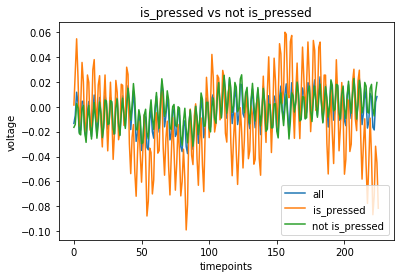

In [6]:
# Compare ERPs
eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df))
plt.plot(np.mean(eeg_list, axis=0), label="all")

feature_name = 'is_pressed'
eeg_list_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==True]))
print("num in first list:", len(eeg_list_1))
plt.plot(np.mean(eeg_list_1, axis=0), label=feature_name)

eeg_list_not_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==False]))
print("num in second list:", len(eeg_list_not_1))
plt.plot(np.mean(eeg_list_not_1, axis=0), label="not " + feature_name)

plt.title(feature_name + " vs not " + feature_name)
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()